In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g4Yq2saXv2pn-PVqxiqeGF3OBsWujcxJWHudF3wuZTWhv2KIW1qZ6w
Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/SatAI_Inversion

/content/drive/MyDrive/SatAI_Inversion


In [3]:
!pip install pycaret[full]
!pip install shap
!pip install graphviz
!pip install dtreeviz

     |████████████████████████████████| 256kB 5.5MB/s 
     |████████████████████████████████| 14.2MB 299kB/s 
     |████████████████████████████████| 245kB 43.6MB/s 
     |████████████████████████████████| 276kB 35.7MB/s 
     |████████████████████████████████| 6.8MB 44.3MB/s 
     |████████████████████████████████| 157.5MB 81kB/s 
     |████████████████████████████████| 65.8MB 61kB/s 
     |████████████████████████████████| 174kB 38.8MB/s 
     |████████████████████████████████| 1.6MB 39.7MB/s 
     |████████████████████████████████| 1.8MB 36.8MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 358kB 42.1MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 48.5MB 98kB/s 
     |████████████████████████████████| 348kB 48.4MB/s 
     |████████████████████████████████| 286kB 53.1MB/s 
     |████████████████████████████████| 3.5MB 40.7MB/s 
     |████████████████████████████████| 1.1MB 31.4MB

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
# from dtreeviz.trees import *
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from pycaret.classification import *

In [ ]:
!pip install dtreeviz

  Using cached https://files.pythonhosted.org/packages/31/57/37124098be67a2edf55c909c77b634d1723abecb54b8ded3e7b3b02af384/dtreeviz-1.1.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/74/46/e81907704ab203206769dee1385dc77e1407576ff8f50a0681d0a6b541be/colour-0.1.5-py2.py3-none-any.whl
     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 42.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=85714ca3e3fc2d8a2b7aa400c044676de1cd3797b69018a6c9d728ecd4a1764c
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=22feabe048aa2bb3b310fe39ef1dcbdeefb2ed8dfcfc3a6f87d30270cd86fc1c
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [2]:
from dtreeviz.trees import *

# Initial analysis

In [3]:
transactions_ready = pd.read_csv('./../datasets/final_transactions_dataset.csv')
df_to_ml = transactions_ready[['investment','date_BUY_fix','date_SELL_fix','company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio']]

In [4]:
investment_map = {'GOOD':1, 'BAD':0} 
df_to_ml = df_to_ml.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [5]:
company_map = {'AAPL':0,
 'AMZN':1,
 'MSFT':2,
 'GOOG':3,
 'FB':4,
 'NVDA':5,
 'F':6,
 'GM':7,
 'HMC':8,
 'TSLA':9,
 'TYO':10,
 'HOG':11,
 'WMT':12,
 'M':13,
 'TGT':14,
 'KSS':15,
 'COST':16,
 'BBY':17,
 'KO':18,
 'PEP':19,
 'PG':20,
 'OR':21,
 'AXP':22,
 'SC':23,
 'DB':24,
 'UBS':25,
 'BAC':26,
 'JPM':27}
df_to_ml = df_to_ml.applymap(lambda s: company_map.get(s) if s in company_map else s)

In [6]:
sector_map = {'TECH':0, 'AUTO':1, 'RETAIL': 2 , 'FMCG': 3, 'BANK':4}
df_to_ml = df_to_ml.applymap(lambda s: sector_map.get(s) if s in sector_map else s)
df_to_ml

,investment,date_BUY_fix,date_SELL_fix,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,2017-06-14,2017-06-21,9,1,7,500,0.336212,0.336167,1.115540,0.009891,0.00,31.1,-0.94,5.65,9.71,-7.60,0.97,-3.54,-15.13
1,0,2018-07-09,2020-02-28,23,4,600,3000,0.291036,0.247294,0.132227,0.018887,4.65,26.9,3.75,0.87,0.89,18.62,0.87,3.38,20.59
2,0,2014-04-03,2015-02-27,24,4,330,5000,0.261244,0.260936,-0.210016,-0.127417,599.56,30.0,0.07,0.79,0.56,0.34,0.73,0.01,0.25
3,1,2015-01-09,2015-04-09,1,0,90,15000,0.329601,0.324660,1.129542,0.081071,0.00,27.4,-0.54,1.62,13.44,-0.27,1.12,-0.57,-2.29
4,1,2016-06-30,2016-07-29,17,2,30,50,0.349990,0.348505,0.462873,0.021559,9.65,12.0,2.92,0.25,2.06,2.53,1.47,7.23,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161893,0,2015-12-10,2016-01-08,2,0,30,4000,0.281871,0.281726,0.977717,0.017937,36.29,14.7,1.40,4.70,5.24,13.29,3.00,6.65,14.44
161894,0,2015-05-08,2015-07-07,15,2,60,50,0.226325,0.263863,0.001703,0.001127,13.03,12.9,4.29,0.60,1.88,4.56,1.91,6.01,14.72
161895,0,2016-04-14,2016-07-13,0,0,90,100,0.275282,0.281343,0.997028,0.060599,11.29,16.5,2.25,2.53,4.26,22.27,1.28,17.44,40.24
161896,0,2015-08-10,2017-01-31,24,4,540,1000,0.292055,0.517937,-0.210016,-0.208501,26.28,30.0,1.12,0.74,0.48,3.49,0.71,0.09,2.09


In [7]:
df_to_ml['date_BUY_fix'] = pd.to_datetime(df_to_ml['date_BUY_fix'])
df_to_ml['date_SELL_fix'] = pd.to_datetime(df_to_ml['date_SELL_fix'])

In [8]:

sell_date='2020-01-01'
sell_date = datetime.strptime(sell_date, '%Y-%m-%d')

buy_date='2015-01-01'
buy_date = datetime.strptime(buy_date, '%Y-%m-%d')


mask= (df_to_ml['date_BUY_fix'] >= buy_date) & (df_to_ml['date_SELL_fix'] <= sell_date)
df_year_transactions=df_to_ml.loc[mask]

In [9]:
df_year_transactions.shape

(121860, 20)

In [10]:
# df_year_transactions=df_to_ml.copy()

In [11]:
df_year_transactions=df_year_transactions.drop(columns=['date_BUY_fix','date_SELL_fix'])

In [12]:
data_train, data_test, label_train, label_test = train_test_split(df_year_transactions.drop('investment',1), df_year_transactions['investment'], test_size = 0.33, random_state = 3838)

In [13]:
# Definir un clasificador
dt4 = DecisionTreeClassifier(random_state=7861, max_depth=4)

# Entrenar el clasificador con el dataset de train
dt4.fit(data_train, label_train)

# Evaluar en train
dt4_score_train = dt4.score(data_train, label_train)
# Evaluar en test
dt4_score_test = dt4.score(data_test, label_test)

In [14]:
print('{:1} {:>23} {:>20}'.format(4, dt4_score_train, dt4_score_test))

4      0.7808955735737207   0.7794797831600935


In [15]:
features=list(df_year_transactions.columns)
features=features[1:]
features

['company',
 'sector',
 'horizon (days)',
 'amount',
 'Volatility_Buy',
 'Volatility_sell',
 'Sharpe Ratio',
 'expected_return (yearly)',
 'PE_ratio',
 'ESG_ranking',
 'EPS_ratio',
 'PS_ratio',
 'PB_ratio',
 'NetProfitMargin_ratio',
 'current_ratio',
 'roa_ratio',
 'roe_ratio']

In [16]:
importances=dt4.feature_importances_

In [17]:
df_feature_importance=pd.DataFrame({'Features': features, 'Importances': dt4.feature_importances_ })

In [18]:
df_view=df_feature_importance.sort_values(by='Importances', ascending=False)
df_view

,Features,Importances
5,Volatility_sell,0.228697
4,Volatility_Buy,0.201953
16,roe_ratio,0.152891
7,expected_return (yearly),0.149208
11,PS_ratio,0.097391
14,current_ratio,0.092827
13,NetProfitMargin_ratio,0.039980
12,PB_ratio,0.028436
6,Sharpe Ratio,0.008617
15,roa_ratio,0.000000


<BarContainer object of 17 artists>

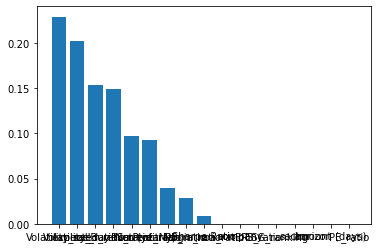

In [25]:
plt.bar(df_view['Features'], df_view['Importances'])

In [20]:
graph_dt = dt4

In [21]:
model_dt = graph_dt.fit(data_train,label_train)

In [22]:
X = df_year_transactions.drop('investment',1)
y = df_year_transactions['investment']

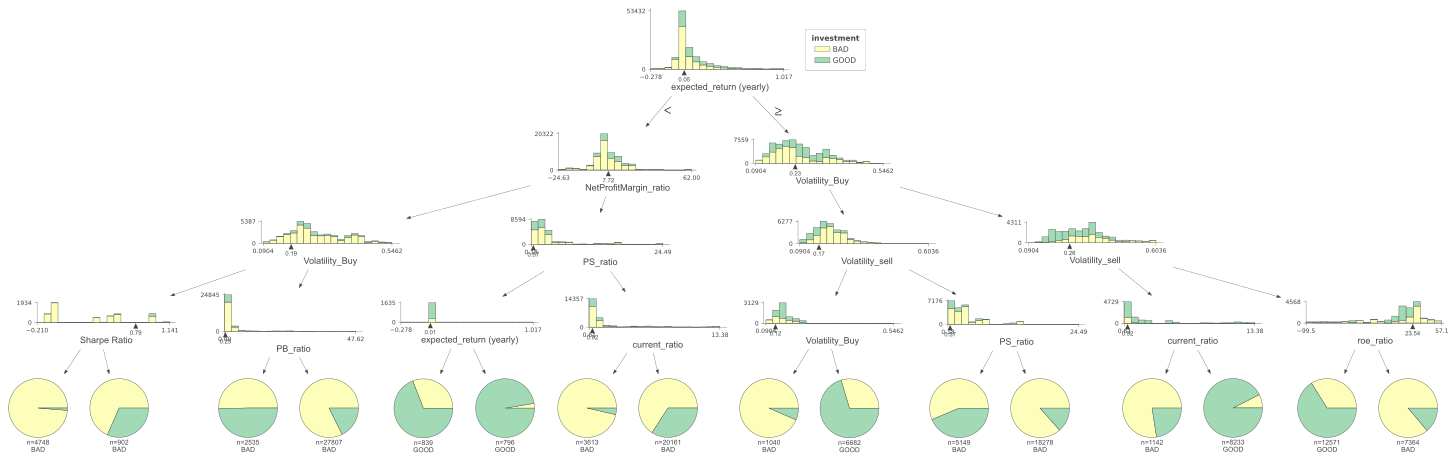

In [27]:
viz = dtreeviz(model_dt, X, y,
                target_name="investment",
                feature_names=['company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio'],
                class_names=["BAD", "GOOD"])
viz.save('finalDF_decision_tree_GOOD_FOR_MEDIUM.svg')
viz